In [27]:
import pandas as pd

# Load datasets
train_data = pd.read_csv("cirrhosis_train.csv")
test_data = pd.read_csv("crrrhosis_test.csv")

train_data.head()

,trainID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,191,D,Placebo,24803,M,Y,Y,N,Y,1.3,151.0,3.08,73.0,1112.0,46.50,49.0,213.0,13.2,4
1,2,326,D,Placebo,18199,F,N,Y,Y,S,6.6,244.0,3.41,199.0,1819.0,170.50,91.0,132.0,12.1,3
2,3,1067,CL,Placebo,17874,F,N,Y,N,S,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6,2
3,4,824,D,D-penicillamine,19577,F,Y,Y,Y,N,1.2,269.0,3.12,NaN,1441.0,165.85,68.0,166.0,11.1,4
4,5,186,D,Placebo,21483,F,N,Y,Y,N,3.2,260.0,3.19,91.0,815.0,127.10,101.0,160.0,12.0,4


In [28]:
test_data.head()

,testID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2583,NaN,D-penicillamine,18393,F,N,N,N,N,0.4,127.0,3.50,14,1062.0,49.60,84.0,334.0,10.3,2
1,2,1360,NaN,D-penicillamine,24020,M,N,N,N,N,1.8,416.0,3.94,121,10165.0,79.98,219.0,213.0,11.0,3
2,3,3445,NaN,Placebo,23445,M,N,Y,Y,N,0.6,252.0,3.83,41,843.0,65.10,83.0,336.0,11.4,4
3,4,1235,NaN,D-penicillamine,23241,F,N,N,Y,N,3.8,426.0,3.22,96,2716.0,210.80,113.0,228.0,10.6,2
4,5,786,NaN,Placebo,16839,F,N,Y,N,N,2.9,332.0,3.60,86,1492.0,134.85,103.0,277.0,11.0,4


In [29]:
# Show dataset sizes
print("Training dataset size:", train_data.shape)
print("Test dataset size:", test_data.shape)

Training dataset size: (224, 20)
Test dataset size: (88, 20)


In [30]:
# Display feature types and missing values
print("Training data info:")
print(train_data.info())

print("\nTest data info:")
print(test_data.info())


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trainID        224 non-null    int64  
 1   N_Days         224 non-null    int64  
 2   Status         224 non-null    object 
 3   Drug           224 non-null    object 
 4   Age            224 non-null    int64  
 5   Sex            224 non-null    object 
 6   Ascites        224 non-null    object 
 7   Hepatomegaly   224 non-null    object 
 8   Spiders        224 non-null    object 
 9   Edema          224 non-null    object 
 10  Bilirubin      224 non-null    float64
 11  Cholesterol    201 non-null    float64
 12  Albumin        224 non-null    float64
 13  Copper         222 non-null    float64
 14  Alk_Phos       224 non-null    float64
 15  SGOT           224 non-null    float64
 16  Tryglicerides  200 non-null    float64
 17  Platelets      221 non-null    flo

In [4]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()
# Doing this so the data is safely stored in its original form if needed

In [31]:
# Selecting numerical columns for both training and test data
numerical_columns_train = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns_test = test_data.select_dtypes(include=['int64', 'float64']).columns

# Filling missing values for numerical features with mean
train_data[numerical_columns_train] = train_data[numerical_columns_train].fillna(train_data[numerical_columns_train].mean())
test_data[numerical_columns_test] = test_data[numerical_columns_test].fillna(test_data[numerical_columns_test].mean())

# Check if data has been successfully filled
print("Training data info:")
print(train_data.info())

print("\nTest data info:")
print(test_data.info())

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trainID        224 non-null    int64  
 1   N_Days         224 non-null    int64  
 2   Status         224 non-null    object 
 3   Drug           224 non-null    object 
 4   Age            224 non-null    int64  
 5   Sex            224 non-null    object 
 6   Ascites        224 non-null    object 
 7   Hepatomegaly   224 non-null    object 
 8   Spiders        224 non-null    object 
 9   Edema          224 non-null    object 
 10  Bilirubin      224 non-null    float64
 11  Cholesterol    224 non-null    float64
 12  Albumin        224 non-null    float64
 13  Copper         224 non-null    float64
 14  Alk_Phos       224 non-null    float64
 15  SGOT           224 non-null    float64
 16  Tryglicerides  224 non-null    float64
 17  Platelets      224 non-null    flo

In [32]:
# Selecting object type columns for training and test data
object_columns_train = train_data.select_dtypes(include=['object']).columns
object_columns_test = test_data.select_dtypes(include=['object']).columns

# Counting distinct values for object type columns in training data
distinct_values_train = train_data[object_columns_train].nunique()

# Counting distinct values for object type columns in test data
distinct_values_test = test_data[object_columns_test].nunique()

print("Distinct values for object type columns in training data:")
print(distinct_values_train)

print("\nDistinct values for object type columns in test data:")
print(distinct_values_test)

# These were checked so we can apply binary encoding to columns having just 2 values, however, in the end we just went with label encoding for all
# as it gets the job done and more efficient to apply on all columns at once

Distinct values for object type columns in training data:
Status          3
Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64

Distinct values for object type columns in test data:
Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64


In [33]:
from sklearn.preprocessing import LabelEncoder

# Define a function to apply label encoding to a DataFrame
def label_encode_columns(df, columns):
    label_encoder = LabelEncoder()
    df[columns] = df[columns].apply(lambda x: label_encoder.fit_transform(x))

# List of columns to apply label encoding (excluding 'Status' for test data)
columns_to_encode_train = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
columns_to_encode_test = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Apply label encoding
label_encode_columns(train_data, columns_to_encode_train)
label_encode_columns(test_data, columns_to_encode_test)

# Apply label encoding to the 'Status' column separately, this is done because we were having trouble coverting status back to its original form
# as it is not possible to store label encoder when transformation is done in bulk (or maybe there is but this was a simple solution)
status_label_encoder = LabelEncoder()
train_data['Status'] = status_label_encoder.fit_transform(train_data['Status'])


In [35]:
test_data.head()
# To verify if label encoding is successful

,testID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2583,NaN,0,18393,0,0,0,0,0,0.4,127.0,3.50,14,1062.0,49.60,84.0,334.0,10.3,2
1,2,1360,NaN,0,24020,1,0,0,0,0,1.8,416.0,3.94,121,10165.0,79.98,219.0,213.0,11.0,3
2,3,3445,NaN,1,23445,1,0,1,1,0,0.6,252.0,3.83,41,843.0,65.10,83.0,336.0,11.4,4
3,4,1235,NaN,0,23241,0,0,0,1,0,3.8,426.0,3.22,96,2716.0,210.80,113.0,228.0,10.6,2
4,5,786,NaN,1,16839,0,0,1,0,0,2.9,332.0,3.60,86,1492.0,134.85,103.0,277.0,11.0,4


In [36]:
# Display label distribution based on training data
label_distribution = train_data['Status'].value_counts()
print("Label distribution based on training data:")
print(label_distribution)


Label distribution based on training data:
Status
0    119
2     93
1     12
Name: count, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y) for training data
X_train = train_data.drop(columns=['Status'])
y_train = train_data['Status']

# Define functions for training, evaluation, and hyperparameter optimization
def train_logistic_regression(X_train, y_train, **kwargs):
    model = LogisticRegression(**kwargs)
    model.fit(X_train, y_train)
    return model

def train_random_forest(X_train, y_train, **kwargs):
    model = RandomForestClassifier(**kwargs)
    model.fit(X_train, y_train)
    return model

def train_svm(X_train, y_train, **kwargs):
    model = SVC(**kwargs)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

def optimize_hyperparameters(model, X_train, y_train, params):
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

# Handle label imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Split the resampled training data into training and validation sets
X_train_resampled, X_val, y_train_resampled, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression model
# lr_model = train_logistic_regression(X_train_resampled, y_train_resampled, max_iter=1000)

from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression model with scaled data and a different solver
lr_model = train_logistic_regression(X_train_resampled_scaled, y_train_resampled, solver='saga', C=0.1)


# Train Random Forest model
rf_model = train_random_forest(X_train_resampled, y_train_resampled)

# Train SVM model
svm_model = train_svm(X_train_resampled, y_train_resampled)

# Evaluate Logistic Regression model
lr_accuracy, lr_report = evaluate_model(lr_model, X_val_scaled, y_val)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Report:")
print(lr_report)

# Evaluate Random Forest model
rf_accuracy, rf_report = evaluate_model(rf_model, X_val, y_val)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Report:")
print(rf_report)

# Evaluate SVM model
svm_accuracy, svm_report = evaluate_model(svm_model, X_val, y_val)
print("\nSVM Accuracy:", svm_accuracy)
print("SVM Report:")
print(svm_report)


Logistic Regression Accuracy: 0.7638888888888888
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.77      0.89      0.83        19
           2       0.83      0.67      0.74        30

    accuracy                           0.76        72
   macro avg       0.77      0.78      0.77        72
weighted avg       0.77      0.76      0.76        72


Random Forest Accuracy: 0.8055555555555556
Random Forest Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.86      1.00      0.93        19
           2       0.82      0.77      0.79        30

    accuracy                           0.81        72
   macro avg       0.80      0.82      0.81        72
weighted avg       0.80      0.81      0.80        72


SVM Accuracy: 0.6944444444444444
SVM Report:
              precision    recall  f1-score   sup

In [38]:
# Rename 'trainID' to 'testID' in the test data before making predictions otherwise it gives errors as trainID was used while training
test_data.rename(columns={'testID': 'trainID'}, inplace=True)

# Make predictions on the test set
test_predictions = rf_model.predict(test_data.drop(columns=['Status']))

# Invert the encoded 'Status' predictions to original form
original_status_predictions = status_label_encoder.inverse_transform(test_predictions)

# Create a DataFrame with original status column
predictions_df = pd.DataFrame({'testID': test_data['trainID'], 'Status': original_status_predictions})

# Revert the column name back to 'trainID' in the test data
test_data.rename(columns={'trainID': 'testID'}, inplace=True)

# Save the predictions to a CSV file
predictions_df.to_csv('rf_predictions.csv', index=False)

# Display the DataFrame
print(predictions_df)


    testID Status
0        1      C
1        2      D
2        3      C
3        4      D
4        5     CL
..     ...    ...
83      84      D
84      85      C
85      86      C
86      87     CL
87      88      D

[88 rows x 2 columns]


In [39]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_
print(feature_importances)


[0.04002363 0.09840097 0.00765447 0.11419634 0.00640616 0.00577718
 0.00983584 0.00885626 0.01331729 0.14405773 0.05742133 0.06310544
 0.07933711 0.06630446 0.05033758 0.04898805 0.07820304 0.09447342
 0.01330369]


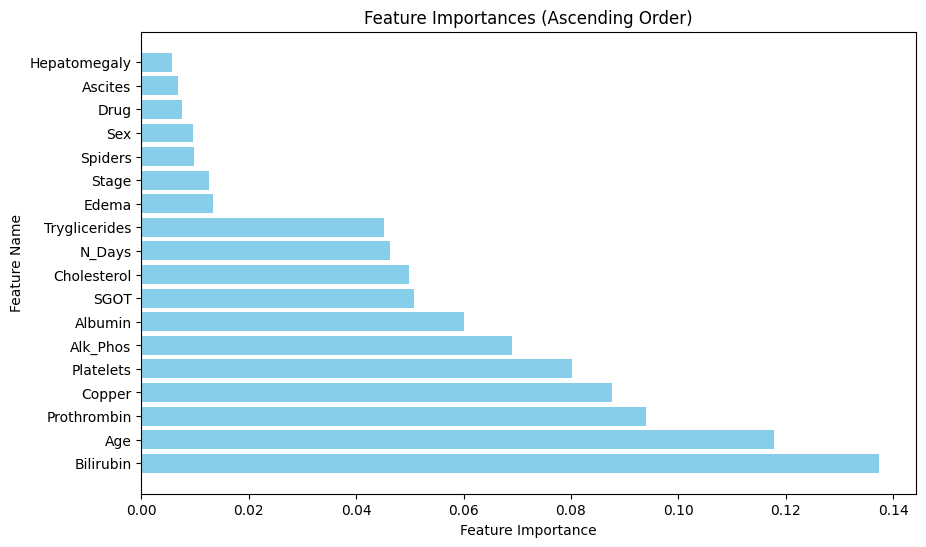

In [43]:
import matplotlib.pyplot as plt

# List of feature names excluding "Status"
feature_names = [
    'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
    'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'
]

# List of feature importances after removing value for "Status"
feature_importances = [0.04622158, 0.00755371, 0.11775766, 0.00966942, 0.00689846, 0.00579773, 0.00980911, 0.01327449, 0.13742858, 0.04985835, 0.06013386, 0.08757466, 0.06909355, 0.05074991, 0.04512238, 0.08023657, 0.09391286, 0.01258142]

# Sort feature importances and feature names together
sorted_indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k])
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances (Ascending Order)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


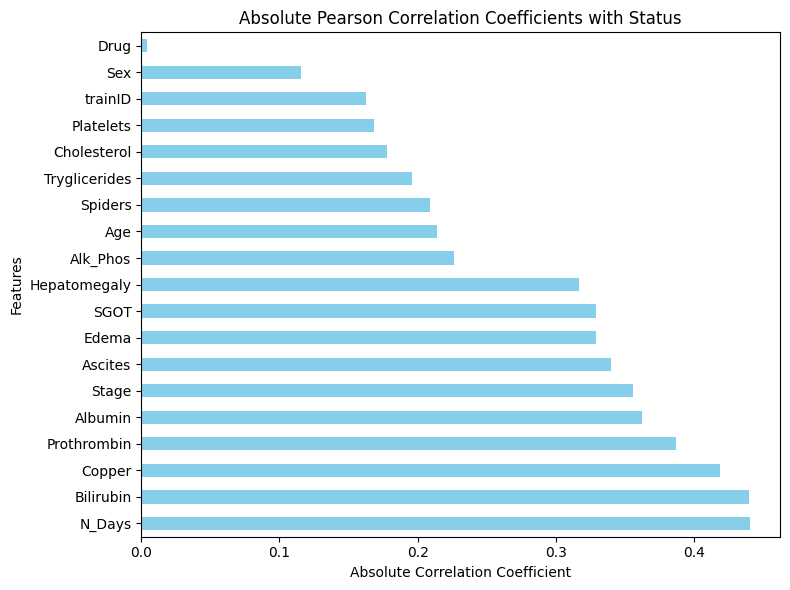

In [41]:
import matplotlib.pyplot as plt

# Calculate Pearson correlation coefficients between features and the target
correlation_matrix = train_data.corr()
status_correlation = correlation_matrix['Status'].abs().sort_values(ascending=False)

# Remove the target variable "Status"
status_correlation = status_correlation.drop('Status')

# Plot sideways bar plot with adjusted height
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
status_correlation.plot(kind='barh', color='skyblue')  # Horizontal bar plot
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.title('Absolute Pearson Correlation Coefficients with Status')
plt.tight_layout()
plt.show()
